<h1>Lab 12 - Visualization</h1>

Standard imports

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns
from IPython import display
from ipywidgets import interact, widgets

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


Selecting every 20th row, up to row 200.

For all the countries in the world, and for years starting in 1800, this data frame shows us basic facts about life in those countries, the
population, the expected lifetime, that is the average age of death for all born, the percentage of children surviving to age five, the average number of babies per woman, the gross national product divided by population, and the income available, on average, to each citizen each day.

In [6]:
gapminder[0:200:10]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
10,Afghanistan,1900,Asia,5021241.0,27.19,51.823,7.00,793.0,2.171116
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
30,Afghanistan,1965,Asia,9935358.0,34.60,66.590,7.67,1182.0,3.236140
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
70,Afghanistan,2005,Asia,24399948.0,52.00,88.040,6.93,1146.0,3.137577
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
90,Albania,1890,Europe,741688.0,35.40,62.480,4.60,1008.0,2.759754


<h2>Income Mountains</h2>

A visualization showing how the number of people at each income level has changed over time.
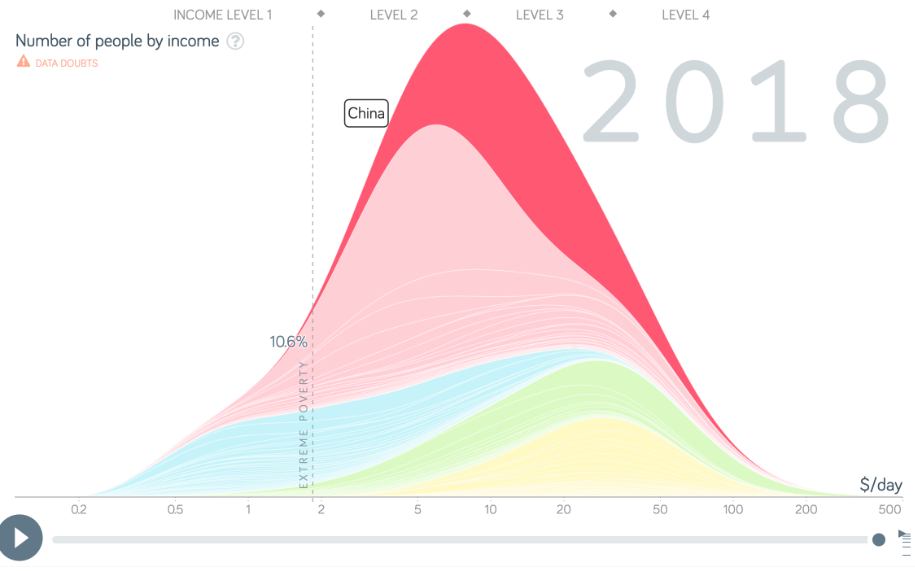

In [28]:
# <h2>Income Mountains</h2>

# A visualization showing how the number of people at each income level has changed over time.


def plot_income_mountains(year):
    data = gapminder[gapminder.year == year]

    pp.figure(figsize=(10, 6))

    sns.kdeplot(
        data=data,
        x='gdp_per_capita',
        weights='population',
        bw_adjust=0.3,
        fill=True,
        common_norm=False,
        alpha=0.7,
        color='blue',
    )

    pp.xscale('log')
    pp.xlabel('GDP per capita (log scale)')
    pp.ylabel('Population density')
    pp.title(f'Income Mountains in {year}')
    pp.grid(True, which='both', ls='--', lw=0.5)

    display.display(pp.gcf())
    pp.close()
interact(plot_income_mountains, year=widgets.IntSlider(min=1952, max=2007, step=5, value=1952))

interactive(children=(IntSlider(value=1952, description='year', max=2007, min=1952, step=5), Output()), _dom_c…

<function __main__.plot_income_mountains(year)>

<h2>Trends</h2>

Create your own line graphs. Select a subject (e.g. child mortality) and see how it has changed over time. Countries and regions can be compared.
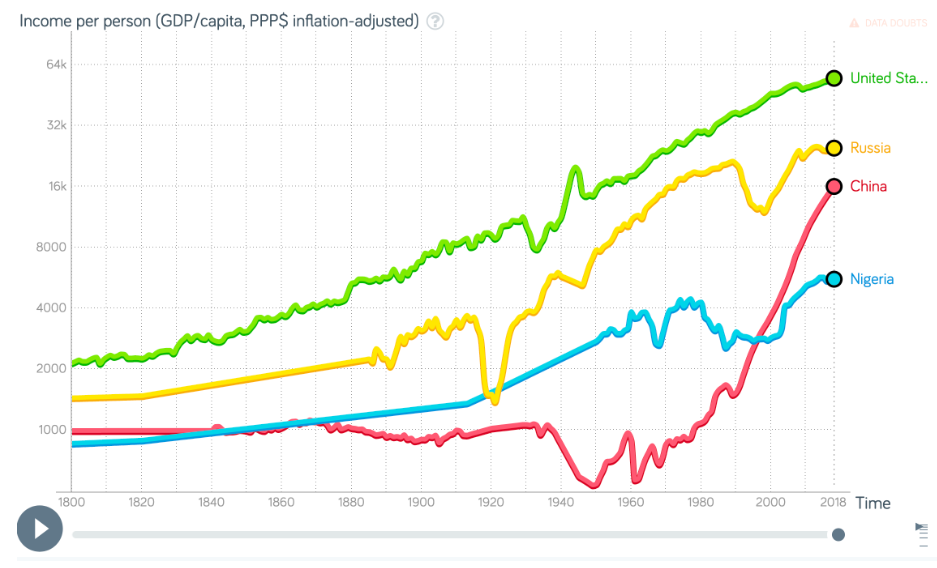

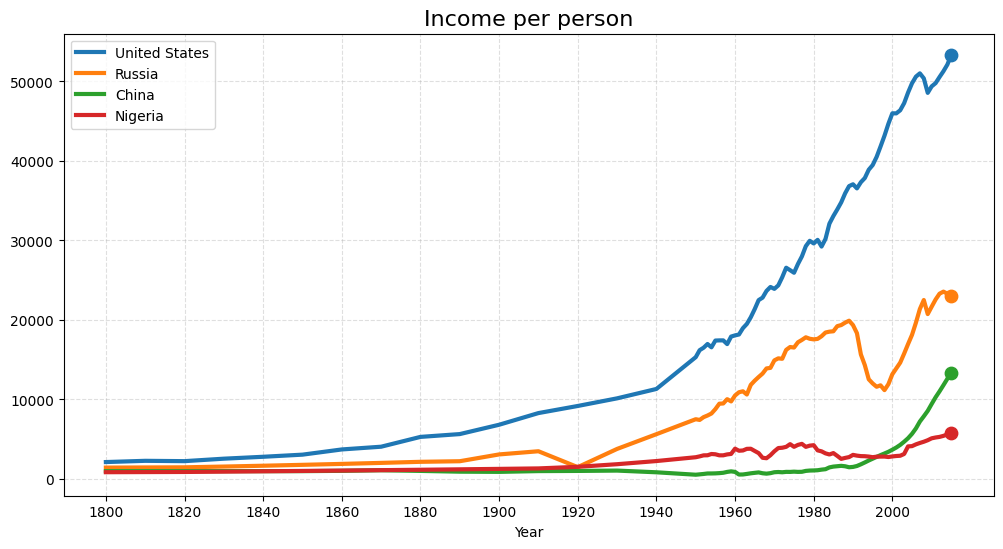

In [11]:
countries = ["United States", "Russia", "China", "Nigeria"]
df_filtered = gapminder[gapminder["country"].isin(countries)]

pp.figure(figsize=(12, 6))

for country in countries:
    df_country = df_filtered[df_filtered["country"] == country]
    pp.plot(df_country.year, df_country.gdp_per_capita, linewidth=3, label=country)
    pp.scatter(df_country["year"].iloc[-1], df_country.gdp_per_capita.iloc[-1], s=80)
    
pp.title("Income per person", fontsize=16)
pp.xlabel("Year")
pp.xticks(range(1800, 2018, 20))
pp.grid(True, linestyle="--", alpha=0.4)
pp.legend()
pp.show()    

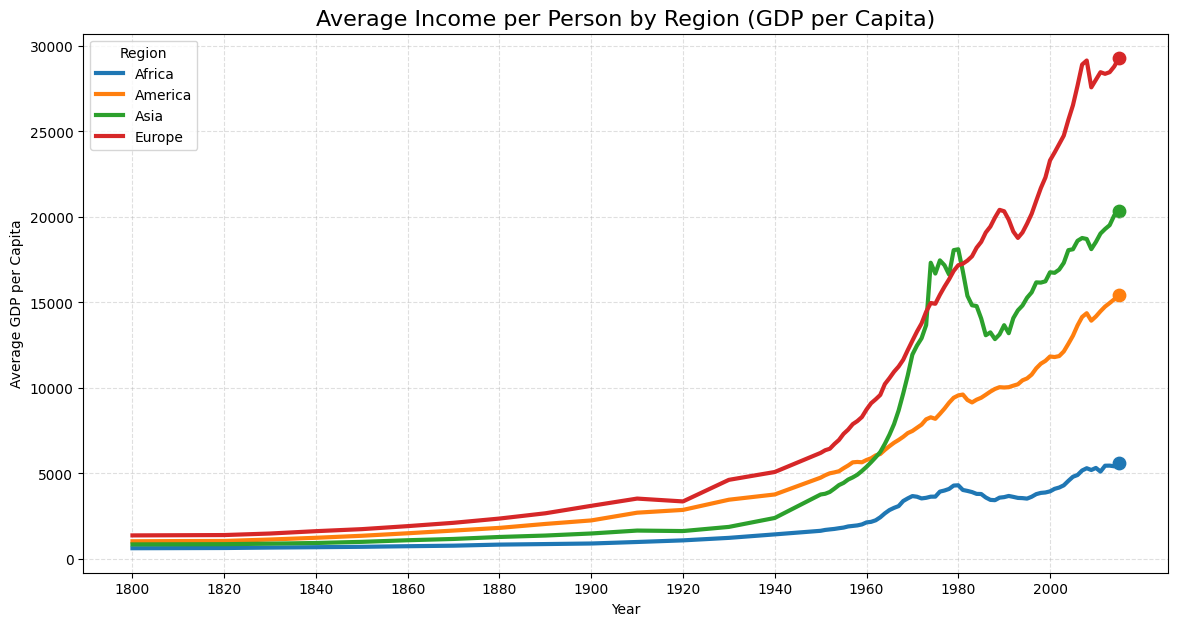

In [12]:
df_region_income = gapminder.groupby(['year', 'region'])['gdp_per_capita'].mean().reset_index()

regions = df_region_income['region'].unique()

pp.figure(figsize=(14, 7))

for region in regions:
    df_sub = df_region_income[df_region_income['region'] == region]

    pp.plot(df_sub['year'], df_sub['gdp_per_capita'], 
            linewidth=3, 
            label=region)
    
    pp.scatter(df_sub['year'].iloc[-1], df_sub['gdp_per_capita'].iloc[-1], s=80)

pp.title("Average Income per Person by Region (GDP per Capita)", fontsize=16)
pp.xlabel("Year")
pp.ylabel("Average GDP per Capita")
pp.xticks(range(1800, 2018, 20))
pp.grid(True, linestyle="--", alpha=0.4)
pp.legend(title='Region', loc='upper left')

pp.show()

<h2>Ranks</h2>

See which countries rank at the top and bottom for different factors (e.g. life expectancy, population) and how it has changed over time.
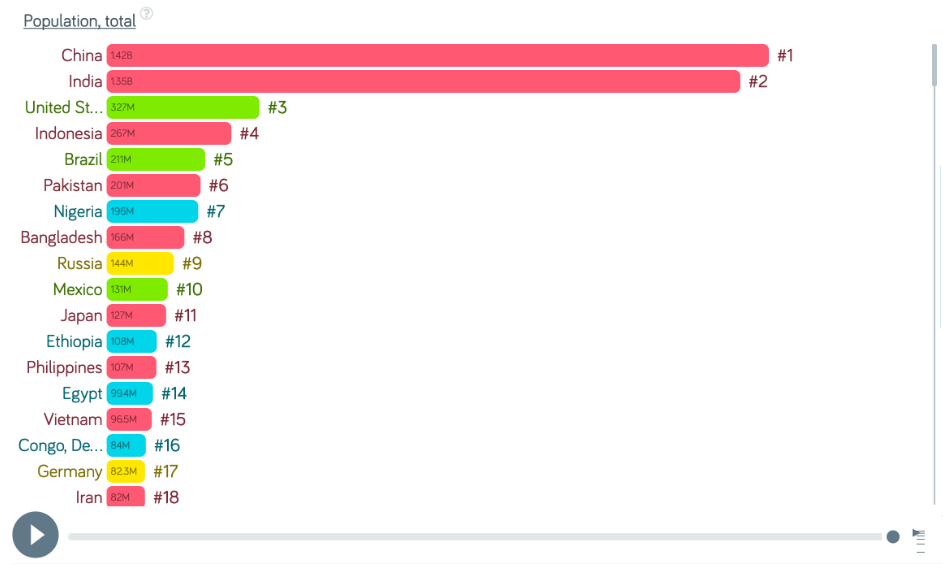

In [ ]:

def plot_ranks(year, column, ascending):
    data = gapminder[gapminder.year == year]
    data_sorted = data.sort_values(by=column, ascending=ascending).head(18)
    
    pp.figure(figsize=(10, 6))
    sns.barplot(data=data_sorted, x=column, y='country', palette='viridis')
    pp.title(f'Top 18 Countries by {column.replace("_", " ").title()} in {year}')
    pp.xlabel(column.replace("_", " ").title())
    pp.ylabel('Country')
    pp.grid(True)
    pp.show()
interact(plot_ranks, 
         year=widgets.IntSlider(min=gapminder.year.min(), max=gapminder.year.max(), step=5, value=2000),
         column=widgets.Dropdown(options=['life_expectancy', 'population', 'gdp_per_capita'], value='life_expectancy'),
         ascending=widgets.Checkbox(value=False, description='Ascending'));


interactive(children=(IntSlider(value=2000, description='year', max=2015, min=1800, step=5), Dropdown(descript…